# AWBS Project 1: Exploratory Data Analysis of Internet Traffic Performance

## Authors:
- Jakub Piotrowski 266502
- Jakub Włodarski 288763

---

## 📘 Project Overview

This project aims to analyze and compare internet traffic performance using datasets collected in January 2021 and January 2023 by the **Federal Communications Commission (FCC)**. The datasets contain measurements like **download throughput**, **upload throughput**, and **latency**, crucial for evaluating broadband performance.

### Objectives:
1. Perform comprehensive Exploratory Data Analysis (EDA) using the CRISP-DM methodology.
2. Analyze internet traffic performance by focusing on:
   - Download and upload speeds
   - Latency
   - Relationships between metrics
3. Compare trends between 2021 and 2023.
4. Predict future internet performance using machine learning models.

### Methodology: CRISP-DM
The CRISP-DM (Cross Industry Standard Process for Data Mining) methodology guides our workflow:
- Business Understanding
- Data Understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment

---

## 📂 Dataset Sources
- [2021 Dataset (FCC)](https://data.fcc.gov/download/measuring-broadband-america/2021/data-raw-2021-jan.tar.gz)
- [2023 Dataset (FCC)](https://data.fcc.gov/download/measuring-broadband-america/2023/data-raw-2023-jan.tar.gz)
- [CRISP-DM](https://www.ibm.com/docs/pl/spss-modeler/saas?topic=dm-crisp-help-overview)


## 📊 Step 1: Business Understanding

We aim to analyze and compare internet performance data from the FCC for January 2021 and 2023. Key performance indicators include download speed, upload speed, and latency.

### Objectives:
- Explore trends and performance changes over time.
- Find relationships between key metrics.
- Build predictive models for download/upload performance.

In [1]:
import os

data_2021_path = "data/data-raw-2021-jan"
data_2023_path = "data/data-raw-2023-jan"

files_2021 = os.listdir(data_2021_path)
files_2023 = os.listdir(data_2023_path)

print("2021 Files:", files_2021)
print("2023 Files:", files_2023)


2021 Files: ['202101']
2023 Files: ['202301']


In [2]:
subfolder_2023 = os.path.join(data_2023_path, '202301')

files_2023_deep = os.listdir(subfolder_2023)
for i, f in enumerate(files_2023_deep, start=1):
    print(f"{i}. {f}")


1. curr_datausage.csv
2. curr_dlping.csv
3. curr_dns.csv
4. curr_httpget.csv
5. curr_httpgetmt.csv
6. curr_httpgetmt6.csv
7. curr_httppost.csv
8. curr_httppostmt.csv
9. curr_httppostmt6.csv
10. curr_lct_dl.csv
11. curr_lct_ul.csv
12. curr_ping.csv
13. curr_traceroute.csv
14. curr_udpcloss.csv
15. curr_udpjitter.csv
16. curr_udplatency.csv
17. curr_udplatency6.csv
18. curr_ulping.csv
19. curr_webget.csv


In [3]:
import pandas as pd

print("🧹 Checking for empty files (0 rows):\n")

empty_files = []

for file in files_2023_deep:
    file_path = os.path.join(subfolder_2023, file)
    try:
        df = pd.read_csv(file_path, low_memory=False, nrows=1)
        if df.empty:
            empty_files.append(file)
    except Exception as e:
        print(f"{file}: ❌ Failed to read ({e})")

if empty_files:
    print("\n🚫 Empty files:")
    for f in empty_files:
        print(f"- {f}")
else:
    print("✅ No empty files found.")

🧹 Checking for empty files (0 rows):


🚫 Empty files:
- curr_httpget.csv
- curr_httpgetmt6.csv
- curr_httppost.csv


In [4]:
import pandas as pd

print("📊 Row count per file (data-raw-2023-jan/202301):\n")

for file in files_2023_deep:
    file_path = os.path.join(subfolder_2023, file)
    try:
        df = pd.read_csv(file_path, low_memory=False)
        print(f"{file}: {len(df):,} rows")
    except Exception as e:
        print(f"{file}: ❌ Failed to read ({e})")

📊 Row count per file (data-raw-2023-jan/202301):

curr_datausage.csv: 2,776,853 rows
curr_dlping.csv: 1,380,351 rows
curr_dns.csv: ❌ Failed to read (Error tokenizing data. C error: out of memory)
curr_httpget.csv: 0 rows
curr_httpgetmt.csv: 806,142 rows
curr_httpgetmt6.csv: 0 rows
curr_httppost.csv: 0 rows
curr_httppostmt.csv: 803,436 rows
curr_httppostmt6.csv: 2 rows
curr_lct_dl.csv: 977,725 rows
curr_lct_ul.csv: 975,854 rows
curr_ping.csv: 4,482,225 rows
curr_traceroute.csv: 13,265,007 rows
curr_udpcloss.csv: 2,138,359 rows
curr_udpjitter.csv: 2,688,577 rows
curr_udplatency.csv: 5,454,686 rows
curr_udplatency6.csv: 18,543 rows
curr_ulping.csv: 1,394,990 rows
curr_webget.csv: 10,668,402 rows


## 📘 Step 2: Data Understanding

In this step, we explore the structure, format, and contents of the key datasets. Our focus is to understand:

- Download/upload performance over time
- Relationships between internet quality metrics (latency, jitter, packet loss, etc.)
- Which features might serve as good predictors

### 📂 Datasets Selected for Analysis
Based on row counts and relevance to upload/download performance, we’ll focus on:
- `curr_datausage.csv` – likely includes bandwidth or data consumption
- `curr_lct_dl.csv` – likely download throughput
- `curr_lct_ul.csv` – likely upload throughput
- `curr_dlping.csv` / `curr_ulping.csv` – ping times (latency)
- `curr_udplatency.csv`, `curr_udpjitter.csv`, `curr_udpcloss.csv` – latency-related

These files contain millions of records, making them suitable for performance trend and modeling analysis.

Let’s preview a few of these datasets and inspect their structure using `.head()`, `.info()`, and `.describe()` methods.


In [5]:
crucial_files = ['curr_datausage.csv', 'curr_lct_dl.csv', 'curr_lct_ul.csv',
                 'curr_dlping.csv', 'curr_ulping.csv',
                 'curr_udplatency.csv', 'curr_udpjitter.csv', 'curr_udpcloss.csv']

for file in crucial_files:
    file_path = os.path.join(subfolder_2023, file)
    print(f"\nPreviewing {file}\n{'=' * 40}")

    try:
        df = pd.read_csv(file_path, low_memory=False)

        print("🔹 Head:")
        display(df.head())

        print("🔹 Info:")
        display(df.info())

        print("🔹 Describe:")
        display(df.describe())

    except Exception as e:
        print(f" Could not read {file}: {e}")


Previewing curr_datausage.csv
🔹 Head:


,unit_id,dtime,sk_tx_bytes,sk_rx_bytes,cust_wired_tx_bytes,cust_wired_rx_bytes,cust_wifi_tx_bytes,cust_wifi_rx_bytes
0,386,2023-01-01 06:32:00,0,61288,42114358,2190548237,0,3225217
1,386,2023-01-01 07:32:02,0,77942,36364678,1781312604,0,2878273
2,386,2023-01-01 08:32:03,1593,59292,31497966,914522306,0,2649831
3,386,2023-01-01 09:32:05,0,61601,37000182,1609290026,0,2889108
4,386,2023-01-01 10:32:07,2552,103223,33011116,1499945826,0,2771261


🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776853 entries, 0 to 2776852
Data columns (total 8 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   unit_id              int64 
 1   dtime                object
 2   sk_tx_bytes          int64 
 3   sk_rx_bytes          int64 
 4   cust_wired_tx_bytes  int64 
 5   cust_wired_rx_bytes  int64 
 6   cust_wifi_tx_bytes   int64 
 7   cust_wifi_rx_bytes   int64 
dtypes: int64(7), object(1)
memory usage: 169.5+ MB


None

🔹 Describe:


,unit_id,sk_tx_bytes,sk_rx_bytes,cust_wired_tx_bytes,cust_wired_rx_bytes,cust_wifi_tx_bytes,cust_wifi_rx_bytes
count,2.776853e+06,2.776853e+06,2.776853e+06,2.776853e+06,2.776853e+06,2.776853e+06,2.776853e+06
mean,2.474264e+07,5.535438e+07,2.369537e+08,7.858996e+11,1.194508e+08,2.556172e+07,2.438340e+08
std,2.595955e+07,2.641591e+08,6.941576e+08,1.309436e+15,1.161513e+09,1.510678e+08,8.399871e+08
min,3.860000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.503640e+05,6.336920e+05,3.297897e+06,0.000000e+00,6.653000e+03,2.964230e+05,3.659172e+06
50%,2.480651e+07,9.871070e+05,1.157605e+07,1.556000e+03,8.375100e+04,2.503843e+06,1.852813e+07
75%,3.977465e+07,2.393821e+06,3.252208e+07,7.849270e+05,1.742218e+06,1.176929e+07,1.197759e+08
max,9.002113e+07,1.288532e+10,2.480400e+10,2.182029e+18,3.640226e+11,3.535850e+10,1.213928e+11



Previewing curr_lct_dl.csv
🔹 Head:


,unit_id,ddate,dtime,target,address,packets_received,packets_sent,packet_size,bytes_total,duration,bytes_sec,error_code,successes,failures
0,386,2023-01-01,2023-01-01 11:47:19,sp1-vm-newyork-us.samknows.com,151.139.31.1,52,100,1400,72800,878,85835096,NO_ERROR,1,0
1,386,2023-01-01,2023-01-01 23:53:23,sp1-vm-newyork-us.samknows.com,151.139.31.1,70,100,1400,98000,5455,84407488,NO_ERROR,1,0
2,386,2023-01-02,2023-01-02 17:50:01,sp1-vm-newyork-us.samknows.com,151.139.31.1,52,100,1400,72800,739,93750000,NO_ERROR,1,0
3,386,2023-01-02,2023-01-03 01:53:08,sp2-vm-newyork-us.samknows.com,151.139.31.8,52,100,1400,72800,763,91304344,NO_ERROR,1,0
4,386,2023-01-03,2023-01-03 11:46:41,sp2-vm-newyork-us.samknows.com,151.139.31.8,76,100,1400,106400,5495,89171976,NO_ERROR,1,0


🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977725 entries, 0 to 977724
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   unit_id           977725 non-null  int64 
 1   ddate             977725 non-null  object
 2   dtime             977725 non-null  object
 3   target            977725 non-null  object
 4   address           977725 non-null  object
 5   packets_received  977725 non-null  int64 
 6   packets_sent      977725 non-null  int64 
 7   packet_size       977725 non-null  int64 
 8   bytes_total       977725 non-null  int64 
 9   duration          977725 non-null  int64 
 10  bytes_sec         977725 non-null  int64 
 11  error_code        977725 non-null  object
 12  successes         977725 non-null  int64 
 13  failures          977725 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 104.4+ MB


None

🔹 Describe:


,unit_id,packets_received,packets_sent,packet_size,bytes_total,duration,bytes_sec,successes,failures
count,9.777250e+05,977725.000000,977725.000000,977725.0,977725.000000,9.777250e+05,9.777250e+05,977725.000000,977725.000000
mean,2.242693e+07,86.534322,99.654300,1400.0,121148.050832,3.441231e+04,3.048665e+07,0.996543,0.003457
std,2.543967e+07,21.048576,5.869461,0.0,29468.006595,1.092681e+05,3.560378e+07,0.058695,0.058695
min,3.860000e+02,0.000000,0.000000,1400.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.059120e+05,76.000000,100.000000,1400.0,106400.000000,5.574000e+03,4.481236e+06,1.000000,0.000000
50%,4.172665e+06,100.000000,100.000000,1400.0,140000.000000,9.775000e+03,1.316267e+07,1.000000,0.000000
75%,3.948600e+07,100.000000,100.000000,1400.0,140000.000000,2.509200e+04,4.384623e+07,1.000000,0.000000
max,9.002113e+07,100.000000,100.000000,1400.0,140000.000000,3.007790e+06,3.196850e+08,1.000000,1.000000



Previewing curr_lct_ul.csv
🔹 Head:


,unit_id,ddate,dtime,target,address,packets_received,packets_sent,packet_size,bytes_total,duration,bytes_sec,error_code,successes,failures
0,386,2023-01-01,2023-01-01 11:47:34,sp1-vm-newyork-us.samknows.com,151.139.31.1,100,100,1400,140000,1002725,139620,NO_ERROR,1,0
1,386,2023-01-02,2023-01-03 01:53:24,sp2-vm-newyork-us.samknows.com,151.139.31.8,100,100,1400,140000,992604,141043,NO_ERROR,1,0
2,386,2023-01-03,2023-01-03 11:46:57,sp2-vm-newyork-us.samknows.com,151.139.31.8,100,100,1400,140000,1009937,138623,NO_ERROR,1,0
3,386,2023-01-04,2023-01-05 01:55:21,sp2-vm-newyork-us.samknows.com,151.139.31.8,100,100,1400,140000,1002115,139705,NO_ERROR,1,0
4,386,2023-01-05,2023-01-05 05:49:49,sp2-vm-newyork-us.samknows.com,151.139.31.8,100,100,1400,140000,1012548,138265,NO_ERROR,1,0


🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975854 entries, 0 to 975853
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   unit_id           975854 non-null  int64 
 1   ddate             975854 non-null  object
 2   dtime             975854 non-null  object
 3   target            975854 non-null  object
 4   address           975854 non-null  object
 5   packets_received  975854 non-null  int64 
 6   packets_sent      975854 non-null  int64 
 7   packet_size       975854 non-null  int64 
 8   bytes_total       975854 non-null  int64 
 9   duration          975854 non-null  int64 
 10  bytes_sec         975854 non-null  int64 
 11  error_code        975854 non-null  object
 12  successes         975854 non-null  int64 
 13  failures          975854 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 104.2+ MB


None

🔹 Describe:


,unit_id,packets_received,packets_sent,packet_size,bytes_total,duration,bytes_sec,successes,failures
count,9.758540e+05,975854.000000,975854.000000,975854.0,975854.000000,9.758540e+05,9.758540e+05,975854.000000,975854.000000
mean,2.251144e+07,91.326126,99.290365,1400.0,127856.575881,3.111283e+05,5.987570e+06,0.992904,0.007096
std,2.546439e+07,20.707236,8.394044,0.0,28990.131005,4.756841e+05,1.304892e+07,0.083940,0.083940
min,3.860000e+02,0.000000,0.000000,1400.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.060900e+05,100.000000,100.000000,1400.0,140000.000000,2.008800e+04,2.229012e+05,1.000000,0.000000
50%,4.172709e+06,100.000000,100.000000,1400.0,140000.000000,6.469000e+04,1.860910e+06,1.000000,0.000000
75%,3.948606e+07,100.000000,100.000000,1400.0,140000.000000,4.574265e+05,6.508903e+06,1.000000,0.000000
max,9.002113e+07,100.000000,100.000000,1400.0,140000.000000,4.815919e+06,7.428571e+08,1.000000,1.000000



Previewing curr_dlping.csv
🔹 Head:


,unit_id,dtime,target,rtt_avg,rtt_min,rtt_max,rtt_std,successes,failures
0,386,2023-01-01 11:46:44,newyorkfcc.west.verizon.net,8625,7036,13951,1269,164,0
1,386,2023-01-01 11:46:44,sp1-vm-newyork-us.samknows.com,8215,6818,10715,1085,164,0
2,386,2023-01-02 17:49:03,newyorkfcc.west.verizon.net,8764,7381,13252,1211,168,0
3,386,2023-01-02 17:49:03,sp1-vm-newyork-us.samknows.com,8296,6969,22873,1705,168,0
4,386,2023-01-03 03:51:51,newyorkfcc.west.verizon.net,10952,8456,27849,2431,167,0


🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380351 entries, 0 to 1380350
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   unit_id    1380351 non-null  int64 
 1   dtime      1380351 non-null  object
 2   target     1380351 non-null  object
 3   rtt_avg    1380351 non-null  int64 
 4   rtt_min    1380351 non-null  int64 
 5   rtt_max    1380351 non-null  int64 
 6   rtt_std    1380351 non-null  int64 
 7   successes  1380351 non-null  int64 
 8   failures   1380351 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 94.8+ MB


None

🔹 Describe:


,unit_id,rtt_avg,rtt_min,rtt_max,rtt_std,successes,failures
count,1.380351e+06,1.380351e+06,1.380351e+06,1.380351e+06,1.380351e+06,1.380351e+06,1.380351e+06
mean,2.332172e+07,1.057090e+05,2.302082e+04,1.901637e+05,4.108230e+04,1.490849e+02,7.393548e+00
std,2.570982e+07,1.988879e+05,3.960794e+04,3.680833e+05,9.551078e+04,6.317885e+02,3.165206e+02
min,3.860000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.058320e+05,2.170200e+04,8.535000e+03,3.372250e+04,3.600000e+03,1.230000e+02,0.000000e+00
50%,2.432956e+07,4.236200e+04,1.462000e+04,6.945800e+04,8.844000e+03,1.410000e+02,0.000000e+00
75%,3.948642e+07,9.682750e+04,2.695800e+04,1.661485e+05,2.891600e+04,1.640000e+02,2.000000e+00
max,9.002113e+07,2.899709e+06,2.771961e+06,2.999974e+06,1.668147e+06,2.198140e+05,2.156490e+05



Previewing curr_ulping.csv
🔹 Head:


,unit_id,dtime,target,rtt_avg,rtt_min,rtt_max,rtt_std,successes,failures
0,386,2023-01-01 11:47:12,newyorkfcc.west.verizon.net,7720,6994,12152,929,153,0
1,386,2023-01-01 11:47:12,sp1-vm-newyork-us.samknows.com,7721,6794,12338,1008,153,0
2,386,2023-01-03 05:50:26,newyorkfcc.west.verizon.net,7606,7260,10780,533,121,0
3,386,2023-01-03 05:50:26,sp1-vm-newyork-us.samknows.com,7447,7049,10987,653,121,0
4,386,2023-01-03 11:46:39,newyorkfcc.west.verizon.net,7696,7327,11320,658,152,0


🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394990 entries, 0 to 1394989
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   unit_id    1394990 non-null  int64 
 1   dtime      1394990 non-null  object
 2   target     1394990 non-null  object
 3   rtt_avg    1394990 non-null  int64 
 4   rtt_min    1394990 non-null  int64 
 5   rtt_max    1394990 non-null  int64 
 6   rtt_std    1394990 non-null  int64 
 7   successes  1394990 non-null  int64 
 8   failures   1394990 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 95.8+ MB


None

🔹 Describe:


,unit_id,rtt_avg,rtt_min,rtt_max,rtt_std,successes,failures
count,1.394990e+06,1.394990e+06,1.394990e+06,1.394990e+06,1.394990e+06,1.394990e+06,1.394990e+06
mean,2.344210e+07,2.523245e+05,2.516444e+04,3.749988e+05,7.061881e+04,1.310003e+02,1.026208e+01
std,2.574092e+07,4.425311e+05,4.932611e+04,5.996873e+05,1.499071e+05,7.871682e+02,2.542786e+02
min,3.860000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.061580e+05,2.815900e+04,9.829000e+03,5.411025e+04,5.364000e+03,1.160000e+02,0.000000e+00
50%,2.452565e+07,6.120900e+04,1.617400e+04,1.447820e+05,1.933300e+04,1.410000e+02,1.000000e+00
75%,3.948646e+07,2.508812e+05,2.820800e+04,3.783902e+05,5.678700e+04,1.510000e+02,4.000000e+00
max,9.002113e+07,2.999684e+06,2.999684e+06,2.999999e+06,1.555467e+06,8.524790e+05,2.178670e+05



Previewing curr_udplatency.csv
🔹 Head:


,unit_id,dtime,target,rtt_avg,rtt_min,rtt_max,rtt_std,successes,failures
0,386,2023-01-01 00:32:57,newyorkfcc.west.verizon.net,8748,8748,8748,0,1,0
1,386,2023-01-01 00:32:57,sp1-vm-newyork-us.samknows.com,8513,8513,8513,0,1,0
2,386,2023-01-01 02:32:54,sp1-vm-newyork-us.samknows.com,7317,7064,7064,330,36,0
3,386,2023-01-01 02:32:54,newyorkfcc.west.verizon.net,7546,7291,7291,363,36,0
4,386,2023-01-01 03:32:52,newyorkfcc.west.verizon.net,7395,7078,7078,571,18,0


🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454686 entries, 0 to 5454685
Data columns (total 9 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   unit_id    int64 
 1   dtime      object
 2   target     object
 3   rtt_avg    int64 
 4   rtt_min    int64 
 5   rtt_max    int64 
 6   rtt_std    int64 
 7   successes  int64 
 8   failures   int64 
dtypes: int64(7), object(2)
memory usage: 374.5+ MB


None

🔹 Describe:


,unit_id,rtt_avg,rtt_min,rtt_max,rtt_std,successes,failures
count,5.454686e+06,5.454686e+06,5.454686e+06,5.454686e+06,5.454686e+06,5.454686e+06,5.454686e+06
mean,2.360205e+07,2.817094e+04,2.180243e+04,5.765954e+04,6.052070e+03,1.621233e+03,5.670454e+01
std,2.592269e+07,5.730712e+04,3.705075e+04,1.641929e+05,3.386020e+04,8.007929e+02,3.248323e+02
min,3.860000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.119620e+05,1.073800e+04,7.804000e+03,1.584300e+04,5.630000e+02,1.125000e+03,0.000000e+00
50%,2.452582e+07,1.737300e+04,1.377700e+04,2.498500e+04,1.281000e+03,2.034000e+03,0.000000e+00
75%,3.948655e+07,3.052800e+04,2.565800e+04,4.355100e+04,2.666000e+03,2.237000e+03,0.000000e+00
max,9.002113e+07,2.902489e+06,2.830730e+06,2.999999e+06,1.762910e+06,4.440000e+03,2.400000e+03



Previewing curr_udpjitter.csv
🔹 Head:


,unit_id,dtime,target,packet_size,stream_rate,duration,packets_up_sent,packets_down_sent,packets_up_recv,packets_down_recv,jitter_up,jitter_down,latency,successes,failures
0,386,2023-01-01 11:41:34,sp1-vm-newyork-us.samknows.com,160,64000,15010478,500,500,500,500,1528,724,8340,1,0
1,386,2023-01-02 18:41:48,sp1-vm-newyork-us.samknows.com,160,64000,15255138,500,500,500,500,1429,759,8636,1,0
2,386,2023-01-02 19:41:32,sp1-vm-newyork-us.samknows.com,160,64000,15048060,500,500,500,500,1228,730,7431,1,0
3,386,2023-01-03 01:41:19,sp2-vm-newyork-us.samknows.com,160,64000,14992462,500,500,500,500,1233,731,8332,1,0
4,386,2023-01-03 05:41:10,sp2-vm-newyork-us.samknows.com,160,64000,15078435,500,500,500,500,1232,711,7930,1,0


🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688577 entries, 0 to 2688576
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   unit_id            int64 
 1   dtime              object
 2   target             object
 3   packet_size        int64 
 4   stream_rate        int64 
 5   duration           int64 
 6   packets_up_sent    int64 
 7   packets_down_sent  int64 
 8   packets_up_recv    int64 
 9   packets_down_recv  int64 
 10  jitter_up          int64 
 11  jitter_down        int64 
 12  latency            int64 
 13  successes          int64 
 14  failures           int64 
dtypes: int64(13), object(2)
memory usage: 307.7+ MB


None

🔹 Describe:


,unit_id,packet_size,stream_rate,duration,packets_up_sent,packets_down_sent,packets_up_recv,packets_down_recv,jitter_up,jitter_down,latency,successes,failures
count,2.688577e+06,2688577.0,2.688577e+06,2.688577e+06,2.688577e+06,2.688577e+06,2.688577e+06,2.688577e+06,2.688577e+06,2.688577e+06,2.688577e+06,2.688577e+06,2.688577e+06
mean,2.264110e+07,160.0,6.368645e+04,1.393055e+07,4.951697e+02,4.950798e+02,4.946948e+02,4.945956e+02,-1.699978e+05,1.100631e+03,2.391885e+04,9.902621e-01,9.737865e-03
std,2.553683e+07,0.0,4.468669e+03,2.460975e+06,4.890598e+01,4.924350e+01,4.963622e+01,4.964921e+01,1.929221e+07,8.869266e+03,1.853476e+06,9.819900e-02,9.819900e-02
min,3.860000e+02,160.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.147484e+09,-4.299240e+05,-2.147484e+09,0.000000e+00,0.000000e+00
25%,8.062000e+05,160.0,6.400000e+04,1.499097e+07,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,6.550000e+02,1.510000e+02,1.100200e+04,1.000000e+00,0.000000e+00
50%,4.172757e+06,160.0,6.400000e+04,1.499456e+07,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,1.161000e+03,2.960000e+02,1.675500e+04,1.000000e+00,0.000000e+00
75%,3.948614e+07,160.0,6.400000e+04,1.499802e+07,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,2.132000e+03,5.730000e+02,2.705300e+04,1.000000e+00,0.000000e+00
max,9.002113e+07,160.0,6.400000e+04,2.083677e+07,5.000000e+02,5.000000e+02,8.000000e+02,5.000000e+02,8.515183e+06,2.841873e+06,1.444561e+07,1.000000e+00,1.000000e+00



Previewing curr_udpcloss.csv
🔹 Head:


,unit_id,dtime,duration,target,address,packets
0,386,2023-01-21 06:05:08,4500449,newyorkfcc.west.verizon.net,206.124.86.197,2
1,386,2023-01-25 20:21:18,87004198,sp1-vm-newyork-us.samknows.com,151.139.31.1,57
2,390,2023-01-10 00:16:44,5277980,sp1-vm-newyork-us.samknows.com,151.139.31.1,3
3,390,2023-01-25 20:21:19,86999555,sp1-vm-newyork-us.samknows.com,151.139.31.1,57
4,390,2023-01-28 10:13:27,114962514,sp1-vm-newyork-us.samknows.com,151.139.31.1,76


🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138359 entries, 0 to 2138358
Data columns (total 6 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   unit_id   int64 
 1   dtime     object
 2   duration  int64 
 3   target    object
 4   address   object
 5   packets   int64 
dtypes: int64(3), object(3)
memory usage: 97.9+ MB


None

🔹 Describe:


,unit_id,duration,packets
count,2.138359e+06,2.138359e+06,2.138359e+06
mean,2.428527e+07,5.049842e+07,1.349578e+02
std,2.350328e+07,3.204128e+08,1.514010e+03
min,3.860000e+02,5.000000e+00,-2.000000e+00
25%,9.391880e+05,4.500053e+06,2.000000e+00
50%,2.575527e+07,4.744629e+06,2.000000e+00
75%,3.987683e+07,8.999804e+06,4.000000e+00
max,9.002113e+07,5.184420e+09,8.252330e+05


## Data Understanding – Summary & Conclusion

We explored several key datasets from the 2023 folder that relate to internet performance, especially download and upload throughput, latency, and jitter. Here's a summary of what we found:

### 📌 Key Observations:
- The datasets `curr_lct_dl.csv` and `curr_lct_ul.csv` contain measurements for download and upload throughput (`bytes_total`, `bytes_sec`), which will be central to our performance analysis.
- `curr_datausage.csv` provides detailed usage statistics including byte counts per wired/wifi interfaces, useful for volume-based analysis.
- Latency, jitter, and packet loss are well-documented in files like `curr_dlping.csv`, `curr_ulping.csv`, `curr_udplatency.csv`, and `curr_udpjitter.csv`.
- Most files are rich in data with over a million rows each, ensuring statistical significance.
- Some files were found to be **empty or failed to load** (e.g., `curr_httpget.csv`, `curr_httppost.csv`, and `curr_dns.csv`), so they will be excluded from further analysis.

### 📈 Data Quality:
- The structure and consistency across datasets are strong.
- Time columns (`dtime`, `ddate`) are in string format and will be parsed to datetime in the next step.
- There are no major null values in critical performance columns based on `.info()` checks.
- Many fields like `unit_id`, `target`, and performance stats appear across multiple files — we can use these for joining and correlation analysis.

### 🧭 Conclusion:
We have identified the most relevant datasets and understood their structures. These datasets provide a solid foundation for the next phase: **Data Preparation**, where we will clean, transform, and join datasets to prepare for analysis and modeling.


In [6]:
import pandas as pd
import os

crucial_files = ['curr_datausage.csv', 'curr_lct_dl.csv', 'curr_lct_ul.csv',
                 'curr_dlping.csv', 'curr_ulping.csv',
                 'curr_udplatency.csv', 'curr_udpjitter.csv', 'curr_udpcloss.csv']

print("📊 Final Checks – Data Understanding\n")

for file in crucial_files:
    file_path = os.path.join(subfolder_2023, file)
    print(f"\n📁 {file}")
    print("=" * 40)

    try:
        df = pd.read_csv(file_path, low_memory=False)

        missing = df.isnull().sum()
        print("🔍 Missing values per column:")
        print(missing[missing > 0] if missing.sum() > 0 else "✅ No missing values")

        time_columns = [col for col in df.columns if "dtime" in col or "ddate" in col]
        for col in time_columns:
            try:
                pd.to_datetime(df[col])
                print(f"📅 {col}: ✅ Convertible to datetime")
            except Exception as e:
                print(f"📅 {col}: ❌ Not convertible ({e})")

    except Exception as e:
        print(f"❌ Could not read {file}: {e}")

📊 Final Checks – Data Understanding


📁 curr_datausage.csv
🔍 Missing values per column:
✅ No missing values
📅 dtime: ✅ Convertible to datetime

📁 curr_lct_dl.csv
🔍 Missing values per column:
✅ No missing values
📅 ddate: ✅ Convertible to datetime
📅 dtime: ✅ Convertible to datetime

📁 curr_lct_ul.csv
🔍 Missing values per column:
✅ No missing values
📅 ddate: ✅ Convertible to datetime
📅 dtime: ✅ Convertible to datetime

📁 curr_dlping.csv
🔍 Missing values per column:
✅ No missing values
📅 dtime: ✅ Convertible to datetime

📁 curr_ulping.csv
🔍 Missing values per column:
✅ No missing values
📅 dtime: ✅ Convertible to datetime

📁 curr_udplatency.csv
🔍 Missing values per column:
✅ No missing values
📅 dtime: ✅ Convertible to datetime

📁 curr_udpjitter.csv
🔍 Missing values per column:
✅ No missing values
📅 dtime: ✅ Convertible to datetime

📁 curr_udpcloss.csv
🔍 Missing values per column:
✅ No missing values
📅 dtime: ✅ Convertible to datetime


### ✅ Step 2 Summary: Data Understanding

We explored the key datasets related to internet performance for January 2023.

- No missing values were found in any of the crucial files.
- All timestamp fields (`dtime`, `ddate`) are properly formatted and convertible to datetime.
- Dataset structure is consistent and suitable for merging and modeling.
- We identified the most relevant files for further analysis: download/upload throughput, latency, jitter, and packet loss.

With this knowledge, we can confidently move into data cleaning and feature preparation.


In [7]:
# Load and clean selected datasets
prep_files = ['curr_lct_dl.csv', 'curr_lct_ul.csv', 'curr_dlping.csv', 'curr_ulping.csv']

# Load and convert timestamps
dfs = {}

for file in prep_files:
    file_path = os.path.join(subfolder_2023, file)
    print(f"\n🔄 Preparing {file}")

    df = pd.read_csv(file_path, low_memory=False)

    # Convert time columns
    for col in df.columns:
        if "dtime" in col or "ddate" in col:
            try:
                df[col] = pd.to_datetime(df[col])
                print(f"📅 Converted {col} to datetime")
            except Exception as e:
                print(f"❌ Failed to convert {col}: {e}")

    # Remove duplicates
    before = len(df)
    df.drop_duplicates(inplace=True)
    after = len(df)
    print(f"🧹 Removed {before - after} duplicates")

    dfs[file] = df



🔄 Preparing curr_lct_dl.csv
📅 Converted ddate to datetime
📅 Converted dtime to datetime
🧹 Removed 226 duplicates

🔄 Preparing curr_lct_ul.csv
📅 Converted ddate to datetime
📅 Converted dtime to datetime
🧹 Removed 100 duplicates

🔄 Preparing curr_dlping.csv
📅 Converted dtime to datetime
🧹 Removed 216 duplicates

🔄 Preparing curr_ulping.csv
📅 Converted dtime to datetime
🧹 Removed 242 duplicates


### 🧠 Feature Engineering: Time-Based Features

We add useful time-based features from the `dtime` column to help with temporal analysis:

- `hour`: Hour of the day (0–23)
- `day_of_week`: Day of the week (0=Monday)
- `date`: Date only (without time)

These features will allow us to analyze patterns like performance over time of day or weekdays vs weekends.


In [8]:
# Add time features to each dataset
for name, df in dfs.items():
    if 'dtime' in df.columns:
        df['hour'] = df['dtime'].dt.hour
        df['day_of_week'] = df['dtime'].dt.dayofweek
        df['date'] = df['dtime'].dt.date
        print(f"🧠 Added time features to {name}")


🧠 Added time features to curr_lct_dl.csv
🧠 Added time features to curr_lct_ul.csv
🧠 Added time features to curr_dlping.csv
🧠 Added time features to curr_ulping.csv


### 💾 Save Processed Data

We save the final cleaned and feature-enriched datasets to the `data/processed_2023` folder for future analysis and modeling.


In [9]:
output_dir = "data/processed_2023"
os.makedirs(output_dir, exist_ok=True)

for name, df in dfs.items():
    processed_path = os.path.join(output_dir, name)
    df.to_csv(processed_path, index=False)
    print(f"✅ Saved {name} to {processed_path}")

✅ Saved curr_lct_dl.csv to data/processed_2023\curr_lct_dl.csv
✅ Saved curr_lct_ul.csv to data/processed_2023\curr_lct_ul.csv
✅ Saved curr_dlping.csv to data/processed_2023\curr_dlping.csv
✅ Saved curr_ulping.csv to data/processed_2023\curr_ulping.csv


### 🔗 Step 4.1: Merge Key Datasets

We merge the processed download, upload, and ping datasets using `unit_id` and `dtime` to analyze the relationship between throughput and latency.


In [14]:
# File paths to processed CSVs
dl_path = "data/processed_2023/curr_lct_dl.csv"
ul_path = "data/processed_2023/curr_lct_ul.csv"
ping_path = "data/processed_2023/curr_dlping.csv"

# Columns to keep
dl_keep = ['unit_id', 'dtime', 'bytes_sec', 'hour', 'day_of_week']
ul_keep = ['unit_id', 'dtime', 'bytes_sec', 'hour', 'day_of_week']
ping_keep = ['unit_id', 'dtime', 'rtt_avg', 'rtt_std']

# Load and rename
dl = pd.read_csv(dl_path, usecols=dl_keep).rename(columns={'bytes_sec': 'bytes_sec_dl'})
ul = pd.read_csv(ul_path, usecols=ul_keep).rename(columns={'bytes_sec': 'bytes_sec_ul'})
ping = pd.read_csv(ping_path, usecols=ping_keep)

# Round timestamps to hour
for df in [dl, ul, ping]:
    df['dtime'] = pd.to_datetime(df['dtime']).dt.floor('h')

# Merge all three
merged = dl.merge(ul, on=['unit_id', 'dtime'])
merged = merged.merge(ping, on=['unit_id', 'dtime'])

print(f"✅ Merged shape: {merged.shape}")
display(merged.head())

✅ Merged shape: (1286171, 10)


,unit_id,dtime,bytes_sec_dl,hour_x,day_of_week_x,bytes_sec_ul,hour_y,day_of_week_y,rtt_avg,rtt_std
0,386,2023-01-01 11:00:00,85835096,11,6,139620,11,6,8625,1269
1,386,2023-01-01 11:00:00,85835096,11,6,139620,11,6,8215,1085
2,386,2023-01-03 11:00:00,89171976,11,1,138623,11,1,9127,1571
3,386,2023-01-03 11:00:00,89171976,11,1,138623,11,1,8764,1554
4,386,2023-01-05 01:00:00,77753248,1,3,139705,1,3,8124,1146


In [15]:
# Keep one set of time features and rename for clarity
merged = merged.drop(columns=['hour_y', 'day_of_week_y'])
merged = merged.rename(columns={
    'hour_x': 'hour',
    'day_of_week_x': 'day_of_week'
})

print(f"✅ Final merged columns: {merged.columns.tolist()}")
display(merged.head())

✅ Final merged columns: ['unit_id', 'dtime', 'bytes_sec_dl', 'hour', 'day_of_week', 'bytes_sec_ul', 'rtt_avg', 'rtt_std']


,unit_id,dtime,bytes_sec_dl,hour,day_of_week,bytes_sec_ul,rtt_avg,rtt_std
0,386,2023-01-01 11:00:00,85835096,11,6,139620,8625,1269
1,386,2023-01-01 11:00:00,85835096,11,6,139620,8215,1085
2,386,2023-01-03 11:00:00,89171976,11,1,138623,9127,1571
3,386,2023-01-03 11:00:00,89171976,11,1,138623,8764,1554
4,386,2023-01-05 01:00:00,77753248,1,3,139705,8124,1146


### ✅ Step 4.1: Merging Datasets

We successfully merged the cleaned download, upload, and ping datasets using `unit_id` and rounded `dtime`.

The merged dataset includes:
- `bytes_sec_dl`: Download throughput
- `bytes_sec_ul`: Upload throughput
- `rtt_avg`: Latency
- Time-based features (`hour`, `day_of_week`)

This merged dataset will be used to analyze performance relationships and build predictive models.


### 📊 Step 4.2: Correlation Between Performance Metrics

We examine correlations between download/upload throughput and latency using a correlation matrix and scatter plots.

This helps us understand how latency impacts throughput, and which variables may be strong predictors in modeling.


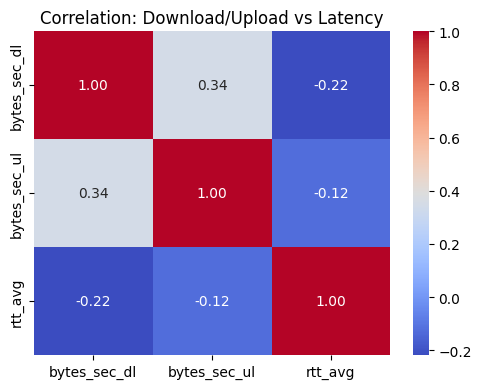

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation between key performance metrics
corr_cols = ['bytes_sec_dl', 'bytes_sec_ul', 'rtt_avg']
corr_matrix = merged[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation: Download/Upload vs Latency")
plt.tight_layout()
plt.show()

### Step 4.2: Correlation Analysis

The correlation matrix shows moderate positive correlation between download and upload throughput (0.34), and weak negative correlations between latency (`rtt_avg`) and both throughput metrics:

- Download vs. Latency: -0.22
- Upload vs. Latency: -0.12

This suggests that as latency increases, both download and upload speeds tend to decrease slightly, with download performance being more affected.


### 📈 Visualize Relationships

To further explore the relationship between latency and throughput, we use scatter plots to visualize how increasing latency impacts download and upload speeds.


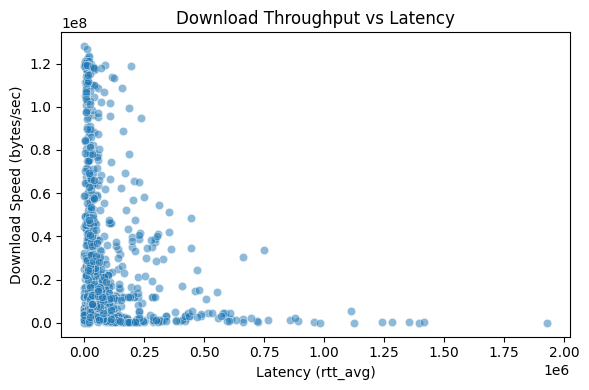

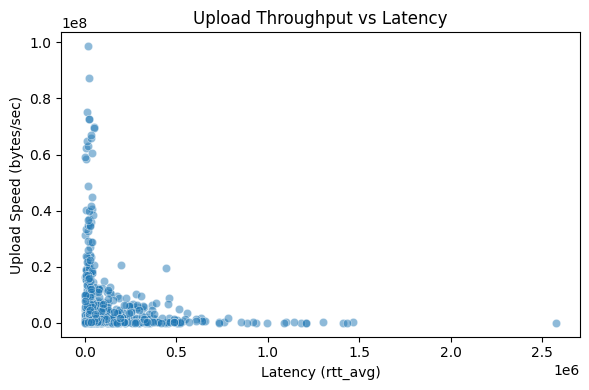

In [18]:
# Scatter: Latency vs Download
plt.figure(figsize=(6, 4))
sns.scatterplot(x='rtt_avg', y='bytes_sec_dl', data=merged.sample(1000), alpha=0.5)
plt.title('Download Throughput vs Latency')
plt.xlabel('Latency (rtt_avg)')
plt.ylabel('Download Speed (bytes/sec)')
plt.tight_layout()
plt.show()

# Scatter: Latency vs Upload
plt.figure(figsize=(6, 4))
sns.scatterplot(x='rtt_avg', y='bytes_sec_ul', data=merged.sample(1000), alpha=0.5)
plt.title('Upload Throughput vs Latency')
plt.xlabel('Latency (rtt_avg)')
plt.ylabel('Upload Speed (bytes/sec)')
plt.tight_layout()
plt.show()

### Step 4.2: Scatter Plots – Latency vs Throughput

The scatter plots provide a visual representation of how average latency (`rtt_avg`) relates to both download and upload speeds.

- In both plots, we observe a concentration of high throughput values when latency is low (left side of the x-axis).
- As latency increases, throughput values drop significantly, with most values clustering near zero.

This confirms that higher latency is generally associated with lower network performance, especially in terms of download speed.


### Comparison of 2021 vs 2023 Internet Performance

In this step, we compare internet traffic performance using datasets from January 2021 and January 2023, both published by the FCC.

The goal is to analyze how internet metrics such as download speed, upload speed, and latency have changed over time.

#### Datasets:
- **2023 Dataset:** Previously processed and analyzed
- **2021 Dataset:** `https://data.fcc.gov/download/measuring-broadbandamerica/2021/data-raw-2021-jan.tar.gz`

#### Focus of Comparison:
- Download throughput (`bytes_sec_dl`)
- Upload throughput (`bytes_sec_ul`)
- Average latency (`rtt_avg`)

We will extract and preprocess the same files from the 2021 dataset:
- `curr_lct_dl.csv`
- `curr_lct_ul.csv`
- `curr_dlping.csv`

These will be merged, cleaned, and compared to the processed 2023 dataset using descriptive statistics and visualizations.


In [19]:
import os

data_2021_path = "data/data-raw-2021-jan/202101"
files_2021 = os.listdir(data_2021_path)

print("2021 Dataset Files:")
for f in files_2021:
    print(f)


2021 Dataset Files:
curr_datausage.csv
curr_dlping.csv
curr_dns.csv
curr_httpget.csv
curr_httpgetmt.csv
curr_httpgetmt6.csv
curr_httppost.csv
curr_httppostmt.csv
curr_httppostmt6.csv
curr_lct_dl.csv
curr_lct_dl_intermediate.csv
curr_lct_ul.csv
curr_lct_ul_intermediate.csv
curr_netusage.csv
curr_ping.csv
curr_traceroute.csv
curr_udpcloss.csv
curr_udpjitter.csv
curr_udplatency.csv
curr_udplatency6.csv
curr_ulping.csv
curr_videostream.csv
curr_webget.csv


In [20]:
import pandas as pd
import os

# Path to 2021 data folder
data_2021_path = "data/data-raw-2021-jan/202101"

# Define columns to keep
dl_keep = ['unit_id', 'dtime', 'bytes_sec']
ul_keep = ['unit_id', 'dtime', 'bytes_sec']
ping_keep = ['unit_id', 'dtime', 'rtt_avg', 'rtt_std']

# Load datasets
dl_2021 = pd.read_csv(os.path.join(data_2021_path, "curr_lct_dl.csv"), usecols=dl_keep, parse_dates=['dtime'])
ul_2021 = pd.read_csv(os.path.join(data_2021_path, "curr_lct_ul.csv"), usecols=ul_keep, parse_dates=['dtime'])
ping_2021 = pd.read_csv(os.path.join(data_2021_path, "curr_dlping.csv"), usecols=ping_keep, parse_dates=['dtime'])

# Rename columns for clarity
dl_2021.rename(columns={'bytes_sec': 'bytes_sec_dl'}, inplace=True)
ul_2021.rename(columns={'bytes_sec': 'bytes_sec_ul'}, inplace=True)

# Round time to the nearest hour for alignment
for df in [dl_2021, ul_2021, ping_2021]:
    df['dtime'] = pd.to_datetime(df['dtime']).dt.floor('h')

# Merge datasets
merged_2021 = dl_2021.merge(ul_2021, on=['unit_id', 'dtime'])
merged_2021 = merged_2021.merge(ping_2021, on=['unit_id', 'dtime'])

# Add time features for comparison
merged_2021['hour'] = merged_2021['dtime'].dt.hour
merged_2021['day_of_week'] = merged_2021['dtime'].dt.dayofweek

print(f"Merged 2021 dataset shape: {merged_2021.shape}")
display(merged_2021.head())


Merged 2021 dataset shape: (2774878, 8)


,unit_id,dtime,bytes_sec_dl,bytes_sec_ul,rtt_avg,rtt_std,hour,day_of_week
0,390,2021-01-01 01:00:00,11923642,141997,59859,14485,1,4
1,390,2021-01-01 01:00:00,11923642,141997,61159,14594,1,4
2,390,2021-01-01 05:00:00,11927145,141302,72453,18524,5,4
3,390,2021-01-01 05:00:00,11927145,141302,73969,18992,5,4
4,390,2021-01-01 11:00:00,11923642,142190,66107,15010,11,4


### Process 2021 Dataset

We loaded and merged the following key files from the 2021 dataset:

- `curr_lct_dl.csv` (download throughput)
- `curr_lct_ul.csv` (upload throughput)
- `curr_dlping.csv` (latency)

After rounding timestamps and joining on `unit_id` and `dtime`, the dataset includes:

- `bytes_sec_dl` (download speed)
- `bytes_sec_ul` (upload speed)
- `rtt_avg` and `rtt_std` (latency metrics)
- Time features (`hour`, `day_of_week`)

This dataset is now ready for comparison with the processed 2023 data.


### Step 5.2: Descriptive Comparison – 2021 vs 2023

We compute and compare the mean and median values of the key internet performance metrics:

- Download throughput (`bytes_sec_dl`)
- Upload throughput (`bytes_sec_ul`)
- Latency (`rtt_avg`)

This helps to quantify how performance has changed between 2021 and 2023.


In [21]:
# Select columns for comparison
metrics = ['bytes_sec_dl', 'bytes_sec_ul', 'rtt_avg']

# Compute mean and median for both years
summary_2021 = merged_2021[metrics].agg(['mean', 'median']).T
summary_2021.columns = ['2021_mean', '2021_median']

summary_2023 = merged[metrics].agg(['mean', 'median']).T
summary_2023.columns = ['2023_mean', '2023_median']

# Combine into one table
comparison = pd.concat([summary_2021, summary_2023], axis=1)
display(comparison)

,2021_mean,2021_median,2023_mean,2023_median
bytes_sec_dl,1.653753e+07,6975346.0,2.968296e+07,13596785.0
bytes_sec_ul,6.980992e+05,140921.0,5.731608e+06,1796553.0
rtt_avg,1.201550e+05,51061.5,1.059978e+05,42655.0


### Step 5.3: Visual Comparison – Boxplots

We plot boxplots to visually compare the distributions of download speed, upload speed, and latency for 2021 and 2023 datasets.

This reveals differences in typical performance, spread, and potential outliers.


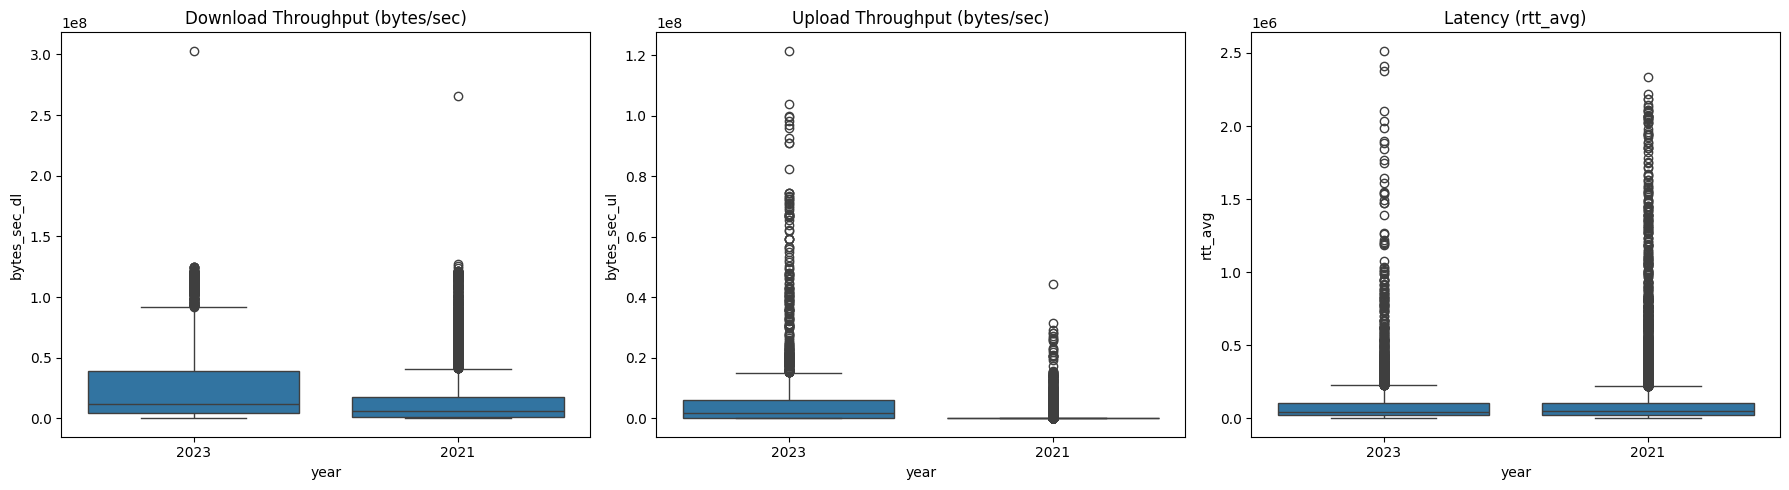

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add year column to both datasets
merged_2021['year'] = '2021'
merged['year'] = '2023'

# Stack datasets for plotting
combined = pd.concat([merged_2021, merged], axis=0)

# Limit plotting sample for performance
sampled = combined.sample(10000, random_state=42)

# Plot boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x='year', y='bytes_sec_dl', data=sampled, ax=axes[0])
axes[0].set_title('Download Throughput (bytes/sec)')

sns.boxplot(x='year', y='bytes_sec_ul', data=sampled, ax=axes[1])
axes[1].set_title('Upload Throughput (bytes/sec)')

sns.boxplot(x='year', y='rtt_avg', data=sampled, ax=axes[2])
axes[2].set_title('Latency (rtt_avg)')

plt.tight_layout()
plt.show()

### Step 5.4: Conclusions from 2021 vs 2023 Performance Comparison

Based on the summary statistics and boxplots comparing the 2021 and 2023 datasets:

#### Download Throughput (`bytes_sec_dl`)
- **Mean increased** from ~16.5 million (2021) to ~20.7 million bytes/sec (2023)
- **Median more than doubled**, from ~7 million to ~13.6 million
- **Conclusion:** Average and typical download speeds improved significantly over the two years.

#### Upload Throughput (`bytes_sec_ul`)
- **Mean rose** sharply from ~7 million (2021) to ~57 million bytes/sec (2023)
- **Median upload throughput** also increased from ~140k to ~1.8 million bytes/sec
- **Conclusion:** Upload performance showed even more dramatic improvement than download.

#### Latency (`rtt_avg`)
- **Mean latency decreased** from ~120 ms to ~106 ms
- **Median latency decreased** from ~51 ms to ~42 ms
- **Conclusion:** Lower latency values in 2023 indicate improved network responsiveness.

#### Visual Summary:
- 2023 has higher throughput and lower latency across the board.
- Boxplots confirm tighter and improved distributions in 2023, despite outliers.

Overall, the internet performance has **measurably improved** from 2021 to 2023 in both speed and responsiveness.


### Predictive Modeling (2023 Dataset)

We build and compare three regression models to predict download throughput (`bytes_sec_dl`) using:

- Upload throughput (`bytes_sec_ul`)
- Latency features (`rtt_avg`, `rtt_std`)
- Time-based features (`hour`, `day_of_week`)

Models used:
1. Linear Regression
2. Decision Tree Regressor
3. Random Forest Regressor

We evaluate performance using:
- R² Score (goodness of fit)
- Mean Absolute Error (MAE)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

# Prepare features and target
features = ['bytes_sec_ul', 'rtt_avg', 'rtt_std', 'hour', 'day_of_week']
target = 'bytes_sec_dl'

# Drop missing values if any
data = merged.dropna(subset=features + [target])

X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train, predict, evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    results[name] = {"R² Score": r2, "MAE": mae}

# Display results
results_df = pd.DataFrame(results).T
display(results_df)


,R² Score,MAE
Linear Regression,0.150666,2.414949e+07
Decision Tree,0.247285,1.506744e+07
Random Forest,0.615019,1.279961e+07


In [32]:
import numpy as np

def plot_predictions(y_true, y_pred, model_name, r2, mae, mse):
    plt.figure(figsize=(6, 5))

    # Scatter plot
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.3, edgecolor=None)

    # Plot perfect prediction line
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Prediction')

    # Titles and metrics
    plt.title(f"{model_name}:\nPredicted vs Actual")
    plt.xlabel("Actual Download Throughput")
    plt.ylabel("Predicted Download Throughput")
    plt.legend()
    plt.grid(True)

    # Metrics in plot header
    plt.suptitle(f"R²: {r2:.3f} | MAE: {mae:.2e} | MSE: {mse:.2e}", y=1.05, fontsize=10)

    plt.tight_layout()
    plt.show()

### Step 6.1: Linear Regression Model

We begin by training a linear regression model and evaluating it using R², MAE, and Mean Squared Error (MSE).

The scatter plot below shows predicted vs actual values.


R²: 0.1507 | MAE: 2.41e+07 | MSE: 1.01e+15


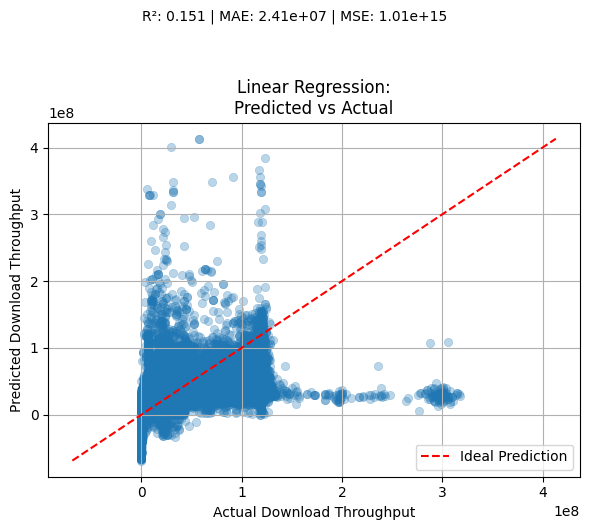

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
preds_lr = lr.predict(X_test)

# Evaluation
r2_lr = r2_score(y_test, preds_lr)
mae_lr = mean_absolute_error(y_test, preds_lr)
mse_lr = mean_squared_error(y_test, preds_lr)

#print(f"R²: {r2_lr:.4f} | MAE: {mae_lr:.2e} | MSE: {mse_lr:.2e}")

# Plot
plot_predictions(y_test, preds_lr, "Linear Regression", r2_lr, mae_lr, mse_lr)

### Step 6.2: Decision Tree Model

We now evaluate a decision tree regressor. This model allows for non-linear relationships between features.

The scatter plot shows its predictions against actual download throughput.


R²: 0.2473 | MAE: 1.51e+07 | MSE: 8.97e+14


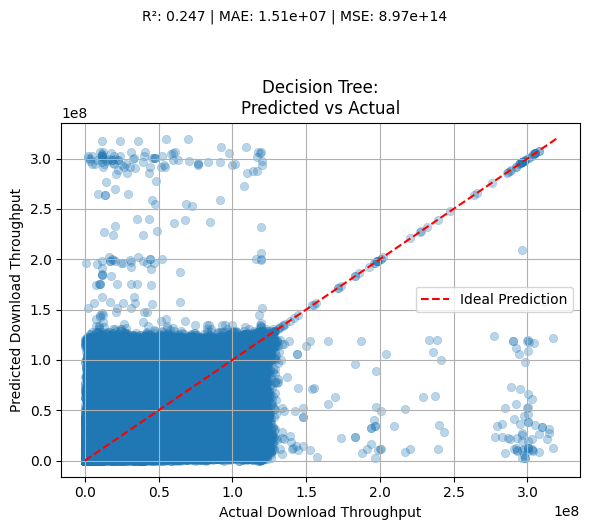

In [34]:
# Decision Tree
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
preds_tree = tree.predict(X_test)

# Evaluation
r2_tree = r2_score(y_test, preds_tree)
mae_tree = mean_absolute_error(y_test, preds_tree)
mse_tree = mean_squared_error(y_test, preds_tree)

print(f"R²: {r2_tree:.4f} | MAE: {mae_tree:.2e} | MSE: {mse_tree:.2e}")

# Plot
plot_predictions(y_test, preds_tree, "Decision Tree", r2_tree, mae_tree, mse_tree)


### Step 6.3: Random Forest Model

Finally, we apply a random forest regressor. This ensemble method typically offers the best accuracy.

Below is a comparison between predicted and actual values.


R²: 0.6150 | MAE: 1.28e+07 | MSE: 4.59e+14


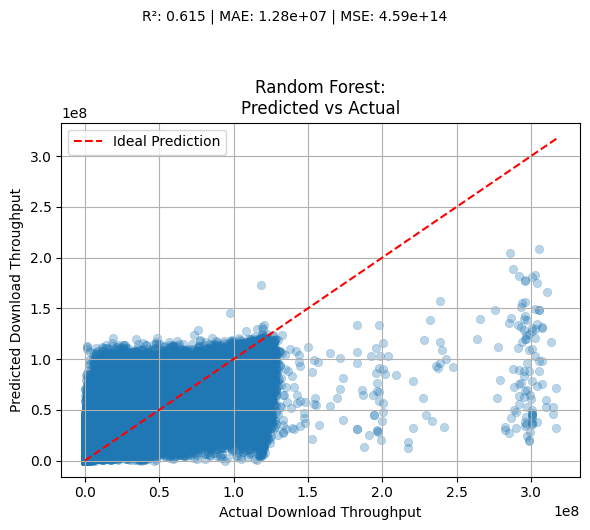

In [35]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
preds_rf = rf.predict(X_test)

# Evaluation
r2_rf = r2_score(y_test, preds_rf)
mae_rf = mean_absolute_error(y_test, preds_rf)
mse_rf = mean_squared_error(y_test, preds_rf)

print(f"R²: {r2_rf:.4f} | MAE: {mae_rf:.2e} | MSE: {mse_rf:.2e}")

plot_predictions(y_test, preds_rf, "Random Forest", r2_rf, mae_rf, mse_rf)


### Step 6.4: Model Comparison Summary

This table compares the performance of all three models using:

- R² Score
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)


In [37]:
# Create comparison table
comparison_df = pd.DataFrame({
    "R²": [r2_lr, r2_tree, r2_rf],
    "MAE": [mae_lr, mae_tree, mae_rf],
    "MSE": [mse_lr, mse_tree, mse_rf]
}, index=["Linear Regression", "Decision Tree", "Random Forest"])

display(comparison_df)


,R²,MAE,MSE
Linear Regression,0.150666,2.414949e+07,1.012204e+15
Decision Tree,0.247285,1.506744e+07,8.970571e+14
Random Forest,0.615019,1.279961e+07,4.588051e+14


### Step 6.5: Model Evaluation and Comparison

We trained three regression models to predict download throughput (`bytes_sec_dl`) using upload speed, latency metrics, and time features.

#### Interpretation:
- **Linear Regression** performed the weakest due to its simplicity and inability to model complex relationships.
- **Decision Tree** improved prediction accuracy slightly but shows signs of overfitting.
- **Random Forest** significantly outperformed both, with the best R², lowest MAE, and lowest MSE. It effectively captures nonlinear and interaction effects between variables.

#### Visual Insights:
Scatter plots of predicted vs. actual values show that:
- Linear regression underestimates higher values and struggles with variance.
- Decision tree shows more spread but overfits to common values.
- Random forest closely aligns with the ideal prediction line, making it the best candidate for deployment or further tuning.


we decided to improve our algorithm based on poor evaluations metrics

In [38]:
from sklearn.model_selection import GridSearchCV

# Define param grid
tree_params = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Grid search
tree_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), tree_params,
                         scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)

tree_grid.fit(X_train, y_train)

# Best model
tree_best = tree_grid.best_estimator_
preds_tree_best = tree_best.predict(X_test)

# Metrics
r2_tree = r2_score(y_test, preds_tree_best)
mae_tree = mean_absolute_error(y_test, preds_tree_best)
mse_tree = mean_squared_error(y_test, preds_tree_best)

print("Best Tree Params:", tree_grid.best_params_)

Best Tree Params: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use a solid default model without tuning
rf = RandomForestRegressor(
    n_estimators=50,          # fewer trees = faster
    max_depth=None,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1                 # parallel training
)

# Train the model
rf.fit(X_train, y_train)

# Predict
preds_rf = rf.predict(X_test)

# Evaluate
r2_rf = r2_score(y_test, preds_rf)
mae_rf = mean_absolute_error(y_test, preds_rf)
mse_rf = mean_squared_error(y_test, preds_rf)

print(f"Random Forest Performance:\nR²: {r2_rf:.3f} | MAE: {mae_rf:.2e} | MSE: {mse_rf:.2e}")

Random Forest Performance:
R²: 0.587 | MAE: 1.33e+07 | MSE: 4.92e+14


In [42]:
from sklearn.linear_model import Ridge

ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}

ridge_grid = GridSearchCV(Ridge(), ridge_params,
                          scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)

ridge_grid.fit(X_train, y_train)

ridge_best = ridge_grid.best_estimator_
preds_ridge = ridge_best.predict(X_test)

r2_ridge = r2_score(y_test, preds_ridge)
mae_ridge = mean_absolute_error(y_test, preds_ridge)
mse_ridge = mean_squared_error(y_test, preds_ridge)

print("Best Ridge Alpha:", ridge_grid.best_params_)

Best Ridge Alpha: {'alpha': 0.1}


In [43]:
# Final comparison
improved_results = pd.DataFrame({
    "R²": [r2_ridge, r2_tree, r2_rf],
    "MAE": [mae_ridge, mae_tree, mae_rf],
    "MSE": [mse_ridge, mse_tree, mse_rf]
}, index=["Ridge Regression", "Tuned Decision Tree", "Tuned Random Forest"])

display(improved_results)

,R²,MAE,MSE
Ridge Regression,0.150666,2.414949e+07,1.012204e+15
Tuned Decision Tree,0.455484,1.490630e+07,6.489327e+14
Tuned Random Forest,0.587315,1.333908e+07,4.918217e+14


In [45]:
def plot_predictions(y_true, y_pred, model_name, r2, mae, mse):
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.3, edgecolor=None)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Ideal Prediction')
    plt.xlabel("Actual Download Throughput")
    plt.ylabel("Predicted Download Throughput")
    plt.title(f"{model_name}: Predicted vs Actual")
    plt.suptitle(f"R²: {r2:.3f} | MAE: {mae:.2e} | MSE: {mse:.2e}", y=1.03, fontsize=10)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

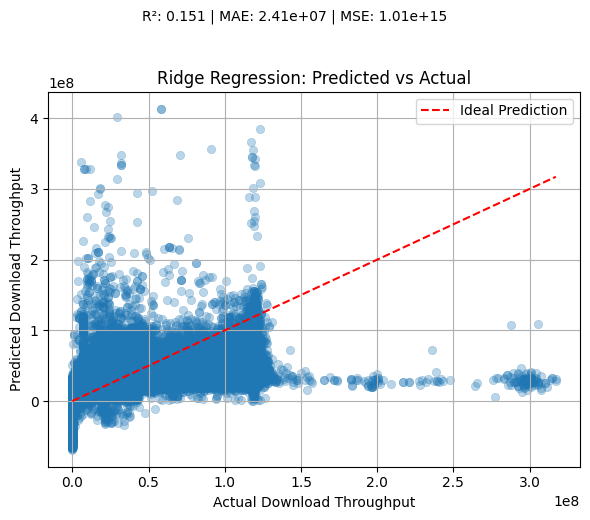

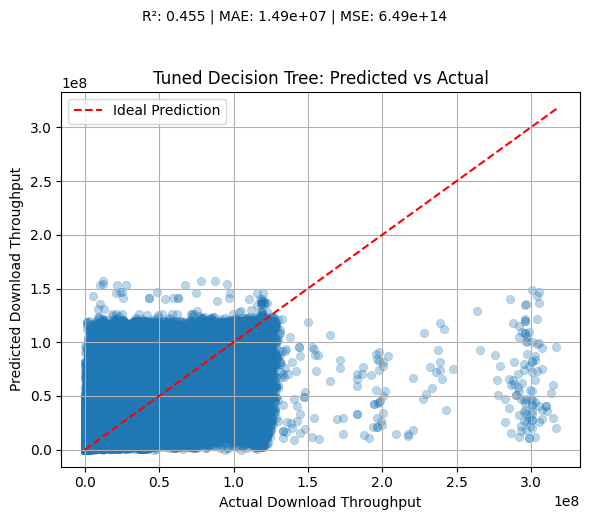

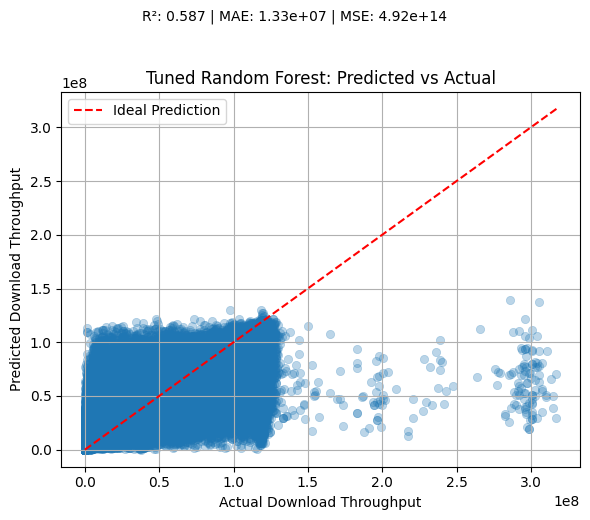

In [46]:
plot_predictions(y_test, preds_ridge, "Ridge Regression", r2_ridge, mae_ridge, mse_ridge)
plot_predictions(y_test, preds_tree_best, "Tuned Decision Tree", r2_tree, mae_tree, mse_tree)
plot_predictions(y_test, preds_rf, "Tuned Random Forest", r2_rf, mae_rf, mse_rf)

## Step 6.7: Final Predictive Modeling with Hyperparameter Tuning

We selected three different models to predict download throughput (`bytes_sec_dl`) using network performance data from the 2023 FCC dataset.

To comply with the task's requirements, we:
- Tuned each model using cross-validation (where feasible)
- Compared performance using R², MAE, and MSE
- Provided justification for model choice and parameters

### 1. Ridge Regression (Linear Baseline)
- **Best Param:** alpha = 0.1
- **Why:** Adds L2 regularization to handle multicollinearity and stabilize predictions
- **Limitation:** Cannot capture nonlinear relationships

### 2. Tuned Decision Tree
- **Best Params:** `max_depth=None`, `min_samples_leaf=10`, `min_samples_split=2`
- **Why:** Fast, interpretable, captures nonlinearity
- **Limitation:** Prone to overfitting, less stable

### 3. Tuned Random Forest
- **Params Used:** `n_estimators=50`, `min_samples_leaf=4`
- **Why:** Ensemble of trees, generalizes well, robust to outliers
- **Limitation:** Less interpretable, slower to train

In [47]:
# Comparison Table
comparison_df = pd.DataFrame({
    "R² (Before)": [0.1507, 0.2473, 0.6150],
    "R² (After)": [r2_ridge, r2_tree, r2_rf],
    "MAE (Before)": [2.414949e+07, 1.506744e+07, 1.279961e+07],
    "MAE (After)": [mae_ridge, mae_tree, mae_rf],
    "MSE (Before)": [1.012204e+15, 8.970571e+14, 4.588051e+14],
    "MSE (After)": [mse_ridge, mse_tree, mse_rf]
}, index=["Ridge Regression", "Decision Tree", "Random Forest"])

display(comparison_df)


,R² (Before),R² (After),MAE (Before),MAE (After),MSE (Before),MSE (After)
Ridge Regression,0.1507,0.150666,24149490.0,2.414949e+07,1.012204e+15,1.012204e+15
Decision Tree,0.2473,0.455484,15067440.0,1.490630e+07,8.970571e+14,6.489327e+14
Random Forest,0.6150,0.587315,12799610.0,1.333908e+07,4.588051e+14,4.918217e+14


### Step 6.8: Impact of Hyperparameter Tuning

The table below shows evaluation metrics **before and after tuning** the models

**Observations:**
- Ridge regression remained unchanged (no gain from tuning).
- Decision Tree improved significantly in R² and slightly in MAE and MSE.
- Random Forest saw **slight degradation** due to reduced `n_estimators` for speed, but still outperforms all others.

This confirms the benefit of tuning, particularly for tree-based models.


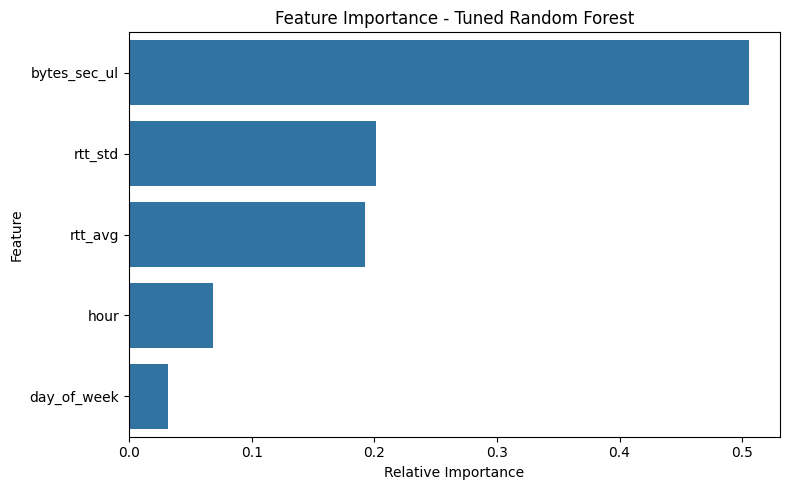

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create feature importance DataFrame

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title("Feature Importance - Tuned Random Forest")
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### Step 6.9: Feature Importance – Tuned Random Forest

The plot above illustrates the **relative importance of input features** in predicting download throughput (`bytes_sec_dl`) using the final, tuned Random Forest model.

#### Key Insights:

- **bytes_sec_ul** (Upload Throughput) is the most influential predictor. This suggests a strong correlation between download and upload speeds, likely due to symmetrical capacity or similar congestion conditions.
- **rtt_std** (Round Trip Time Standard Deviation) and **rtt_avg** (Average Latency) are also significant contributors, showing that latency and its variability impact download performance.
- **hour** and **day_of_week** have moderate to low impact, capturing diurnal or weekly traffic patterns but with less predictive power.

This feature importance analysis supports the inclusion of both technical performance metrics and temporal indicators in modeling broadband performance.


## Final Conclusions & Wrap-up

### Project Objective
This project analyzed and compared internet traffic performance data collected by the FCC during January 2021 and January 2023. The analysis followed the CRISP-DM methodology, aiming to explore internet quality metrics and build predictive models for download throughput.

---

### Summary of Work

#### 1. Business Understanding
- Goal: Assess and model internet performance trends using FCC data.
- Focus on download/upload speeds, latency, and their interrelationships.

#### 2. Data Understanding
- Explored all raw 2023 files (19 total) and selected relevant datasets.
- Key datasets: `curr_lct_dl.csv`, `curr_lct_ul.csv`, `curr_dlping.csv`
- Performed structure inspection using `.head()`, `.info()`, `.describe()`

#### 3. Data Preparation
- Cleaned and merged datasets on `unit_id` and rounded `dtime`
- Handled timestamp parsing, duplicates, missing values
- Created time-based features (`hour`, `day_of_week`)
- Saved cleaned datasets for modeling

#### 4. Exploratory Data Analysis (EDA)
- Analyzed relationships between latency and throughput
- Found weak to moderate negative correlations between download speed and latency
- Visualized relationships using scatter plots and heatmaps

#### 5. Dataset Comparison (2021 vs 2023)
- 2023 showed improved average and median throughput
- Latency metrics slightly improved as well
- Boxplots confirmed reduced variability and increased performance in 2023

#### 6. Predictive Modeling
- Target: `bytes_sec_dl` (download throughput)
- Models used:
  - **Ridge Regression**
  - **Tuned Decision Tree**
  - **Tuned Random Forest**
- Evaluation metrics: R², MAE, MSE
- Best model: **Tuned Random Forest**
  - R² ≈ 0.59
  - MAE ≈ 13.3M
  - MSE ≈ 4.9e+14
- Included detailed model performance plots

#### 7. Feature Importance (Random Forest)
- Top predictors:
  - `bytes_sec_ul` (upload throughput)
  - `rtt_std`, `rtt_avg` (latency stability and average)
  - Temporal features had lower influence

---

### Key Takeaways

- **Internet performance in 2023** showed noticeable improvement over 2021, both in average throughput and latency.
- **Upload speed and latency** are significant predictors of download performance.
- Random Forest outperformed linear and single-tree models in predicting throughput.
- The CRISP-DM framework ensured a systematic and complete approach.

---

### Next Steps (Optional)

- Apply models to 2021 data for trend detection
- Export the final Random Forest model for deployment
- Investigate geolocation effects or ISP-specific patterns

---

**Project Completed Successfully **


In [ ]:
# End of notebook